In [1]:
import pandas as pd
import numpy as np



from pmdarima.arima import auto_arima, ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('goldprices.csv', index_col=0)

In [3]:
data

,Ngày,Lần,cuối,Mở,Cao,Thấp,KL,%,Thay,đổi
0,Ngày,Lần,cuối,Mở,Cao,Thấp,KL,%,Thay,đổi
1,30/06/2021,"1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%,NaN,NaN,NaN
2,29/06/2021,"1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%,NaN,NaN,NaN
3,28/06/2021,"1,780.70","1,782.00","1,786.10","1,770.40",160.79K,0.16%,NaN,NaN,NaN
4,25/06/2021,"1,777.80","1,775.70","1,791.00","1,773.60",161.20K,0.06%,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1320,05/07/2016,"1,414.40","1,414.40","1,414.40","1,414.40",0.00K,4.62%,NaN,NaN,NaN
1321,04/07/2016,"1,352.00","1,345.00","1,360.15","1,343.00",-,0.48%,NaN,NaN,NaN
1322,03/07/2016,"1,345.50","1,344.50","1,347.55","1,338.85",-,-3.50%,NaN,NaN,NaN
1323,01/07/2016,"1,394.30","1,394.30","1,394.30","1,394.30",0.00K,1.40%,NaN,NaN,NaN


In [4]:
data = data.iloc[1: , :]

In [5]:
data

,Ngày,Lần,cuối,Mở,Cao,Thấp,KL,%,Thay,đổi
1,30/06/2021,"1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%,NaN,NaN,NaN
2,29/06/2021,"1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%,NaN,NaN,NaN
3,28/06/2021,"1,780.70","1,782.00","1,786.10","1,770.40",160.79K,0.16%,NaN,NaN,NaN
4,25/06/2021,"1,777.80","1,775.70","1,791.00","1,773.60",161.20K,0.06%,NaN,NaN,NaN
5,24/06/2021,"1,776.70","1,778.20","1,788.60","1,772.70",152.23K,-0.38%,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1320,05/07/2016,"1,414.40","1,414.40","1,414.40","1,414.40",0.00K,4.62%,NaN,NaN,NaN
1321,04/07/2016,"1,352.00","1,345.00","1,360.15","1,343.00",-,0.48%,NaN,NaN,NaN
1322,03/07/2016,"1,345.50","1,344.50","1,347.55","1,338.85",-,-3.50%,NaN,NaN,NaN
1323,01/07/2016,"1,394.30","1,394.30","1,394.30","1,394.30",0.00K,1.40%,NaN,NaN,NaN


In [6]:
df = data[['Ngày', 'Lần']]

In [7]:
df = df.rename({"Ngày":"Date","Lần":"Price"}, axis='columns')

In [9]:
df.columns =['Date','Price']
df["Date"] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df["Week_Day"] = df['Date'].dt.weekday

In [10]:
df = df.loc[~((df["Week_Day"]==6)|(df["Week_Day"]==5))]

In [11]:
df

,Date,Price,Week_Day
1,2021-06-30,"1,771.60",2
2,2021-06-29,"1,763.60",1
3,2021-06-28,"1,780.70",0
4,2021-06-25,"1,777.80",4
5,2021-06-24,"1,776.70",3
...,...,...,...
1319,2016-07-06,"1,422.80",2
1320,2016-07-05,"1,414.40",1
1321,2016-07-04,"1,352.00",0
1323,2016-07-01,"1,394.30",4


In [12]:
data_fri = df.loc[df["Week_Day"]==4]

In [13]:
data_sat=  data_fri.copy()
data_sat['Date'] = data_sat['Date'] + pd.Timedelta(value=1, unit="D")
data_sat['Week_Day'] = data_sat['Week_Day'] +1

In [14]:
data_sun=  data_fri.copy()
data_sun['Date'] = data_sun['Date'] + pd.Timedelta(value=2, unit="D")
data_sun['Week_Day'] = data_sun['Week_Day'] +2

In [15]:
data_final = pd.concat([df,data_sat,data_sun])

In [16]:
data_final.sort_values('Date',ascending=True).iloc[0:20]

,Date,Price,Week_Day
1324,2016-06-30,"1,375.00",3
1323,2016-07-01,"1,394.30",4
1323,2016-07-02,"1,394.30",5
1323,2016-07-03,"1,394.30",6
1321,2016-07-04,"1,352.00",0
1320,2016-07-05,"1,414.40",1
1319,2016-07-06,"1,422.80",2
1318,2016-07-07,"1,415.00",3
1317,2016-07-08,"1,412.00",4
1317,2016-07-09,"1,412.00",5


In [17]:
df.sort_values('Date',ascending=True).iloc[0:100]

,Date,Price,Week_Day
1324,2016-06-30,"1,375.00",3
1323,2016-07-01,"1,394.30",4
1321,2016-07-04,"1,352.00",0
1320,2016-07-05,"1,414.40",1
1319,2016-07-06,"1,422.80",2
...,...,...,...
1227,2016-11-10,"1,326.60",3
1226,2016-11-11,"1,282.70",4
1225,2016-11-14,"1,286.90",0
1224,2016-11-15,"1,290.90",1


In [18]:
(data_fri['Date'] + pd.Timedelta(value=2, unit="D")).sort_values

<bound method Series.sort_values of 4      2021-06-27
9      2021-06-20
14     2021-06-13
19     2021-06-06
25     2021-05-30
          ...    
1302   2016-07-31
1307   2016-07-24
1312   2016-07-17
1317   2016-07-10
1323   2016-07-03
Name: Date, Length: 258, dtype: datetime64[ns]>

In [19]:
pd.Timedelta(value=1, unit="D")

Timedelta('1 days 00:00:00')

In [20]:
pd.to_datetime(df.Date,format='%d/%m/%Y').sort_values(ascending=True)[0:20]

1324   2016-06-30
1323   2016-07-01
1321   2016-07-04
1320   2016-07-05
1319   2016-07-06
1318   2016-07-07
1317   2016-07-08
1316   2016-07-11
1315   2016-07-12
1314   2016-07-13
1313   2016-07-14
1312   2016-07-15
1311   2016-07-18
1310   2016-07-19
1309   2016-07-20
1308   2016-07-21
1307   2016-07-22
1306   2016-07-25
1305   2016-07-26
1304   2016-07-27
Name: Date, dtype: datetime64[ns]

In [21]:
import pandas_profiling as pp

In [22]:
profile = pp.ProfileReport(data_final)
profile

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
df2 = data_final.set_index("Date")
df2

,Price,Week_Day
Date,,
2021-06-30,"1,771.60",2
2021-06-29,"1,763.60",1
2021-06-28,"1,780.70",0
2021-06-25,"1,777.80",4
2021-06-24,"1,776.70",3
...,...,...
2016-07-31,"1,415.70",6
2016-07-24,"1,385.50",6
2016-07-17,"1,383.50",6


In [24]:
df1= df2.drop(['Week_Day'], axis=1)

In [25]:
df1

,Price
Date,
2021-06-30,"1,771.60"
2021-06-29,"1,763.60"
2021-06-28,"1,780.70"
2021-06-25,"1,777.80"
2021-06-24,"1,776.70"
...,...
2016-07-31,"1,415.70"
2016-07-24,"1,385.50"
2016-07-17,"1,383.50"


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2021-06-30 to 2016-07-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [27]:
df1['Price'] = pd.to_numeric(df1['Price'].astype(str).str.replace(',', ''), errors='coerce')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2021-06-30 to 2016-07-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


In [29]:
df3= df1.sort_values(by='Date', ascending=True)

In [30]:
df3.to_csv('dataclean.csv')

In [31]:
profile = pp.ProfileReport(df3)
profile

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
import matplotlib.pyplot as plt

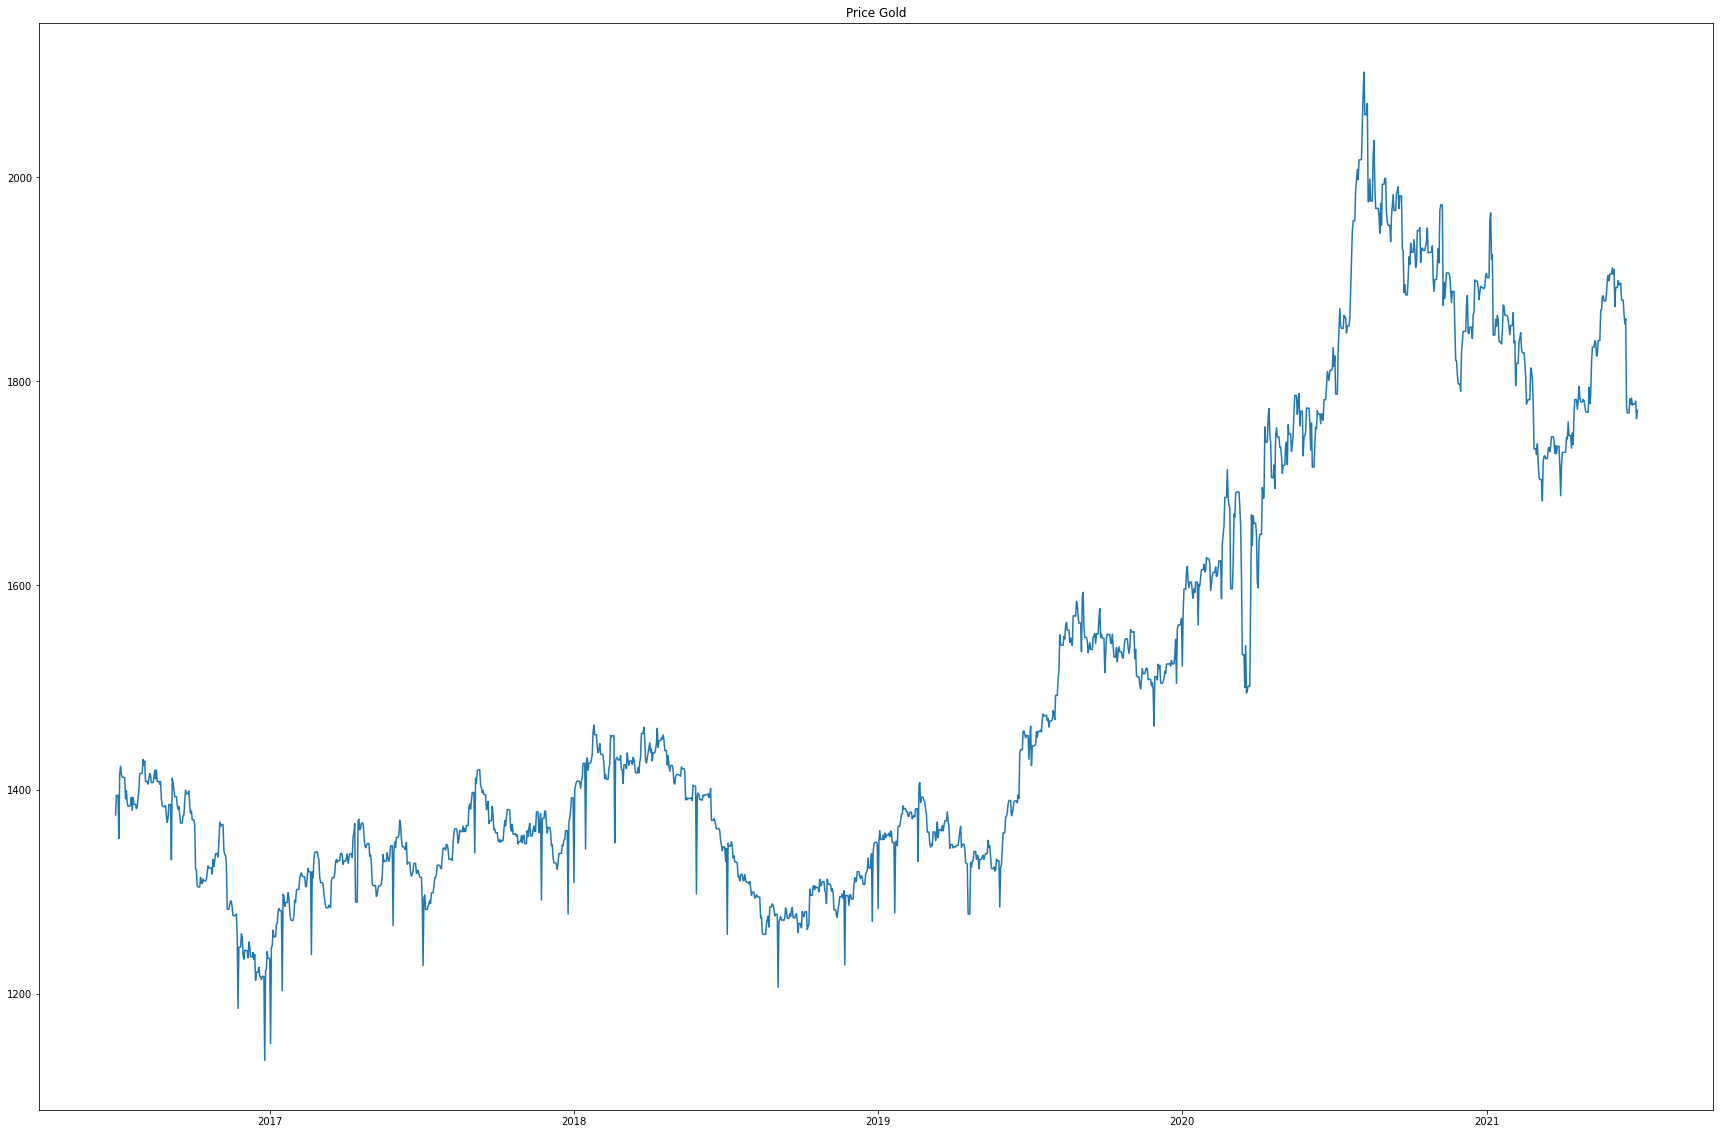

In [33]:
plt.figure(figsize=(30,20))
plt.plot(df3)
plt.title("Price Gold")
plt.show()

In [34]:
df3.tail()

,Price
Date,
2021-06-26,1777.8
2021-06-27,1777.8
2021-06-28,1780.7
2021-06-29,1763.6
2021-06-30,1771.6
